In [62]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('https://raw.githubusercontent.com/Tomoharuu/VideoGameSalesTest/main/Video_Games_Sales_as_at_22_Dec_2016.csv')
display(df)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Ao olhar as vendas por ano, se percebe os anos nos quais a venda de jogos de videogame estavam em alta

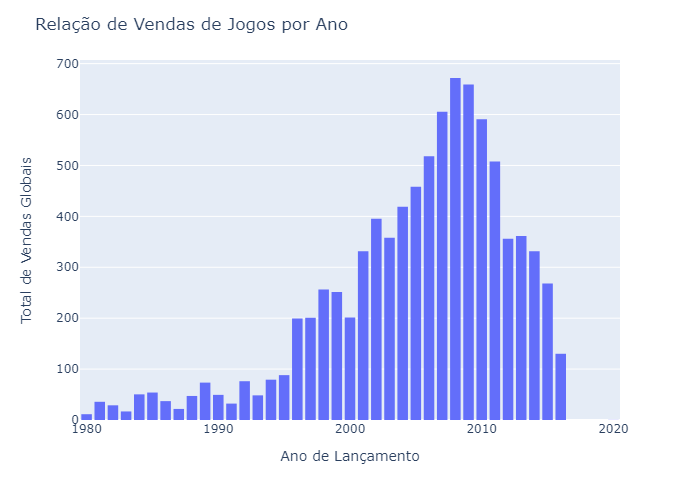

In [64]:
vendas_ano = px.histogram(df, x='Year_of_Release', y='Global_Sales')
vendas_ano = vendas_ano.update_layout(bargap=0.2, title_text='Relação de Vendas de Jogos por Ano', yaxis_title_text='Total de Vendas Globais', xaxis_title_text='Ano de Lançamento')
vendas_ano.show("png")

In [65]:
critica_anual = df[['Critic_Score', 'Year_of_Release']].groupby('Year_of_Release').mean()
critica_anual = critica_anual.dropna(subset='Critic_Score', how='all')
critica_anual = critica_anual.reset_index()
display(critica_anual)

,Year_of_Release,Critic_Score
0,1985.0,59.000000
1,1988.0,64.000000
2,1992.0,85.000000
3,1994.0,69.000000
4,1996.0,89.875000
5,1997.0,85.294118
6,1998.0,81.821429
7,1999.0,75.769231
8,2000.0,69.349650
9,2001.0,71.414110


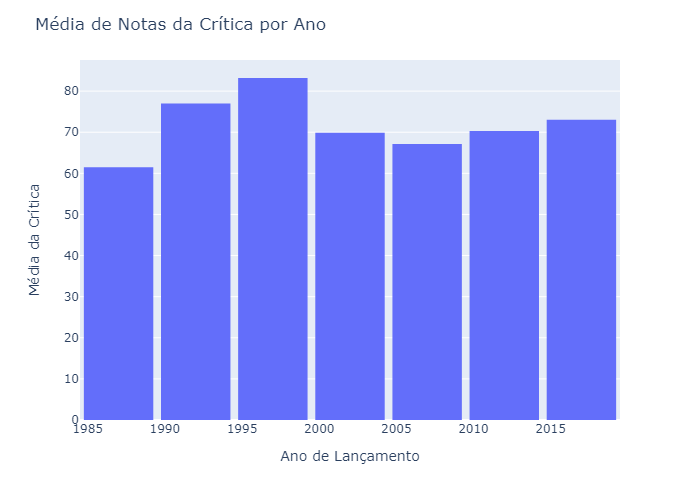

In [66]:
critica_anual = px.histogram(critica_anual, x='Year_of_Release', y="Critic_Score", histfunc='avg')
critica_anual.update_layout(bargap=0.1, xaxis_title_text='Ano de Lançamento', yaxis_title_text='Média da Crítica', title_text='Média de Notas da Crítica por Ano')
critica_anual.show("png")

In [67]:
vendas_publisher = df[['Global_Sales', 'Publisher']].groupby('Publisher').sum().sort_values(by='Global_Sales', ascending=False).reset_index()
display(vendas_publisher)

,Publisher,Global_Sales
0,Nintendo,1788.81
1,Electronic Arts,1116.96
2,Activision,731.16
3,Sony Computer Entertainment,606.48
4,Ubisoft,471.61
...,...,...
576,Takuyo,0.01
577,EON Digital Entertainment,0.01
578,Paradox Development,0.01
579,Red Flagship,0.01


In [68]:
top20_publisher = vendas_publisher.head(20)
display(top20_publisher)

,Publisher,Global_Sales
0,Nintendo,1788.81
1,Electronic Arts,1116.96
2,Activision,731.16
3,Sony Computer Entertainment,606.48
4,Ubisoft,471.61
5,Take-Two Interactive,403.82
6,THQ,338.44
7,Konami Digital Entertainment,282.39
8,Sega,270.35
9,Namco Bandai Games,254.62


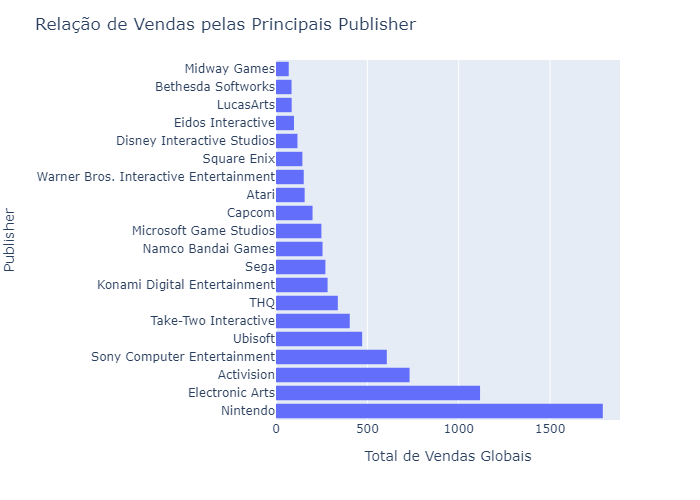

In [69]:
top20_publisher = px.histogram(top20_publisher, x='Global_Sales', y='Publisher')
top20_publisher.update_layout(title='Relação de Vendas pelas Principais Publisher', xaxis_title_text='Total de Vendas Globais')
top20_publisher.show("png")

In [70]:
top16_publisher = vendas_publisher.head(16)
display(top16_publisher)

,Publisher,Global_Sales
0,Nintendo,1788.81
1,Electronic Arts,1116.96
2,Activision,731.16
3,Sony Computer Entertainment,606.48
4,Ubisoft,471.61
5,Take-Two Interactive,403.82
6,THQ,338.44
7,Konami Digital Entertainment,282.39
8,Sega,270.35
9,Namco Bandai Games,254.62


In [71]:
copia = vendas_publisher.copy(deep=True)
copia.loc[copia['Global_Sales'] < 247, 'Publisher'] = 'Outras publisher'
display(copia)

,Publisher,Global_Sales
0,Nintendo,1788.81
1,Electronic Arts,1116.96
2,Activision,731.16
3,Sony Computer Entertainment,606.48
4,Ubisoft,471.61
...,...,...
576,Outras publisher,0.01
577,Outras publisher,0.01
578,Outras publisher,0.01
579,Outras publisher,0.01


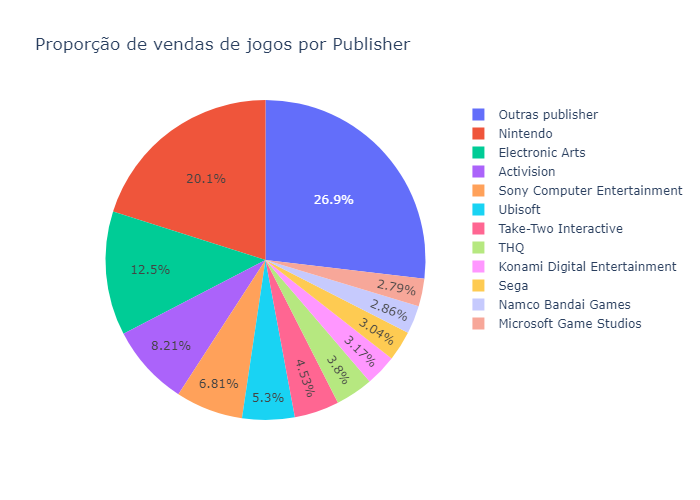

In [72]:
# Testando Gráfico de Pizza com Top 10 Publisher
pizza_copia = px.pie(copia, values='Global_Sales', names='Publisher', title='Proporção de vendas de jogos por Publisher')
pizza_copia.show("png")

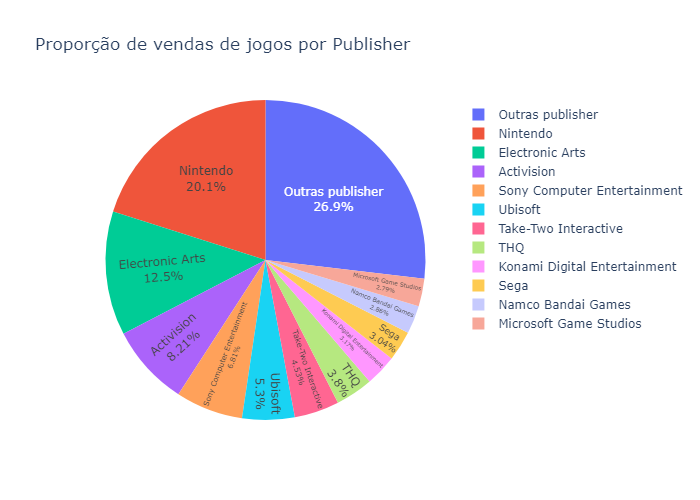

In [73]:
# Ajuste das legendas no gráfico de pizza
pizza_copia.update_traces(textposition='inside', textinfo='percent+label')
pizza_copia.show("png")

In [74]:
vendas_regiao = df[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Year_of_Release']].groupby('Year_of_Release').sum().reset_index()
display(vendas_regiao)

,Year_of_Release,NA_Sales,JP_Sales,EU_Sales
0,1980.0,10.59,0.00,0.67
1,1981.0,33.40,0.00,1.96
2,1982.0,26.92,0.00,1.65
3,1983.0,7.76,8.10,0.80
4,1984.0,33.28,14.27,2.10
5,1985.0,33.73,14.56,4.74
6,1986.0,12.50,19.81,2.84
7,1987.0,8.46,11.63,1.41
8,1988.0,23.87,15.76,6.59
9,1989.0,45.15,18.36,8.44


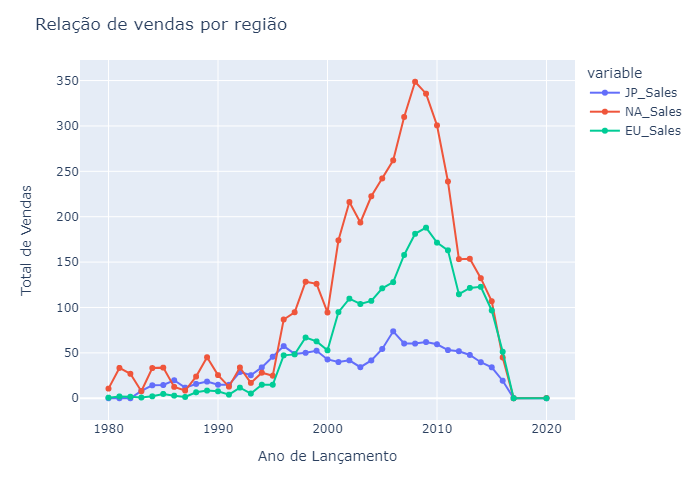

In [75]:
linha_regiao = px.line(vendas_regiao, x='Year_of_Release', y=['JP_Sales', 'NA_Sales', 'EU_Sales'], markers=True)
linha_regiao.update_layout(title_text='Relação de vendas por região', yaxis_title_text='Total de Vendas', xaxis_title_text='Ano de Lançamento')
linha_regiao.show("png")